In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel
%matplotlib inline
from matplotlib.path import Path
from matplotlib.figure import Figure
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.cm as cm
from IPython.core.display import display
from sklearn import linear_model
import matplotlib.patches as patches
import math
import numpy as np
from numpy import percentile
from numpy.random import seed
import os
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import datetime as dt
import time
import re
import pyodbc
import sqlalchemy as sal
from sklearn.preprocessing import normalize 
from sqlalchemy import create_engine
import pandas as pd
from scipy.stats import bartlett
from scipy.stats import boxcox
from sklearn.preprocessing import normalize 
from scipy.stats import jarque_bera
from scipy.stats import levene
from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xlsxwriter
from sklearn.cluster import KMeans

In [3]:
#Create a DataFrame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates, starting January 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing `knowledge` and oscillating `confidence`.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

Text(0.5, 1.0, 'Scatter Plot')

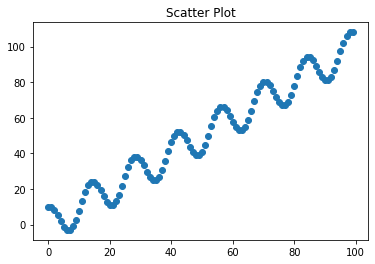

In [4]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Linked Scatter Plot')

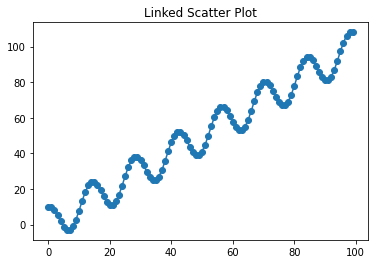

In [5]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.plot(learning_progress.knowledge, learning_progress.confidence)
plt.title('Linked Scatter Plot')

No handles with labels found to put in legend.


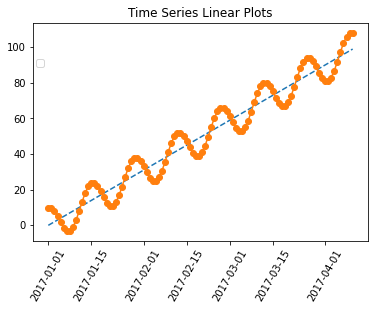

In [6]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--')
plt.plot(learning_progress.date, learning_progress.confidence, 'o-')
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

In [7]:
# Create a DataFrame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates, starting January 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing `knowledge` and oscillating `confidence`.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 3.5) + np.arange(0, 100)

In [8]:
learning_progress['day_of_week'] = learning_progress.date.apply(
    lambda x: str(dt.datetime.weekday(x)))

X = pd.get_dummies(learning_progress.day_of_week)
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)
Y = learning_progress['confidence']
lm = linear_model.LinearRegression()

lm.fit(X, Y)
lm.score(X, Y)

1.0

In [9]:
print(X.columns)
print(lm.coef_)

Index(['0', '1', '2', '3', '4', '5', '6', 'date'], dtype='object')
[ 6.23489802 -2.22520934 -9.00968868 -9.00968868 -2.22520934  6.23489802
 10.          1.        ]


## The Hodrick–Prescott filter is a tool used in real business cycle theory, to remove the cyclical component of a time series from raw data.

Text(0.5, 1.0, 'smoothed x')

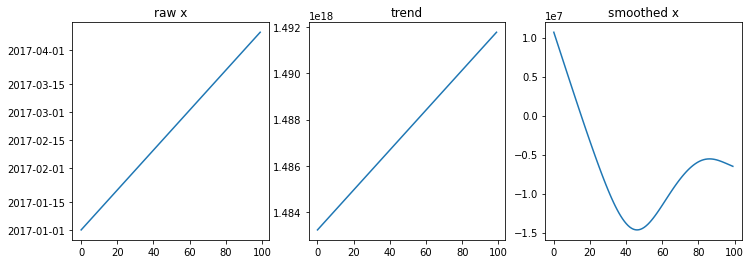

In [13]:
# get part of the data

x = learning_progress.date
x_smoothed, x_trend = sm.tsa.filters.hpfilter(x, lamb=100000)
fig, axes = plt.subplots(figsize=(12,4), ncols=3)
axes[0].plot(x)
axes[0].set_title('raw x')
axes[1].plot(x_trend)
axes[1].set_title('trend')
axes[2].plot(x_smoothed)
axes[2].set_title('smoothed x')

# ARIMA

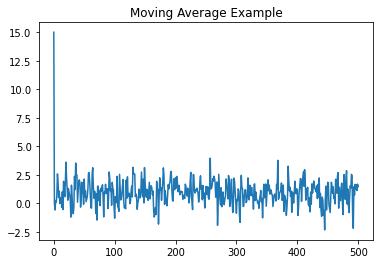

In [17]:
x_ar = [15]
for i in range(500):
    y = 5 + .7*x_ar[i-1] 
    x_ar.append(float(y))
    

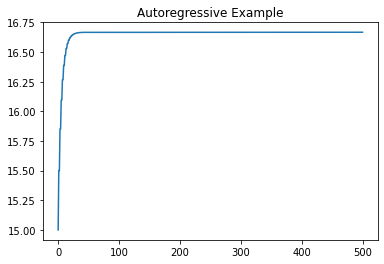

In [19]:
plt.plot(x_ar)
plt.title('Autoregressive Example')
plt.show()

Text(0.5, 1.0, 'AR(1) PACF')

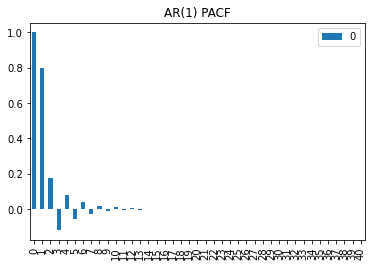

In [18]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(pacf(x_ar))
x_acf.plot(kind='bar')
plt.title("AR(1) PACF")

In [20]:
x_ma = [15]
e_t = 0
for i in range(500):
    e = np.random.randn(1)
    y = 1 + .3*e_t + e
    x_ma.append(float(y))
    e_t=e

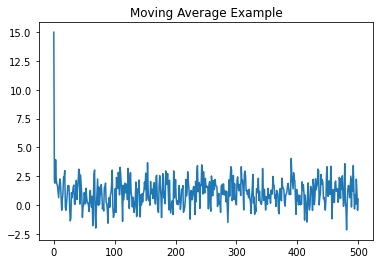

In [24]:
plt.plot(x_ma)
plt.title('Moving Average Example')
plt.show()

# Finding the order

Text(0.5, 1.0, 'AR(1) PACF')

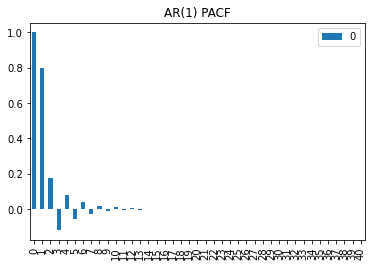

In [22]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(pacf(x_ar))
x_acf.plot(kind='bar')
plt.title("AR(1) PACF")

Text(0.5, 1.0, 'MA(1) PACF')

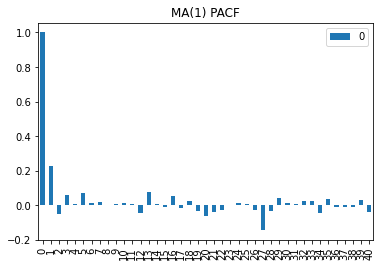

In [23]:
x_acf = pd.DataFrame(pacf(x_ma))
x_acf.plot(kind='bar')
plt.title('MA(1) PACF')

# Stock price modeling
## Use of time series modelin to model the value of the S&P 500 stock market index.

In [25]:
# Data
sp_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/SP500_raw.csv')

In [26]:
# Convert exchange rate to a number, with coercion to throw `NA` values if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

# Remove `NA` values
sp_data.dropna(inplace=True)

In [27]:
sp_data.head()

,DATE,SP500,price
0,2008-01-02,1447.16,1447.16
1,2008-01-03,1447.16,1447.16
2,2008-01-04,1411.63,1411.63
3,2008-01-07,1416.18,1416.18
4,2008-01-08,1390.19,1390.19


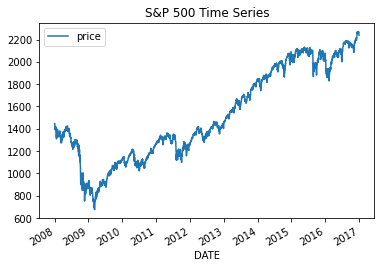

In [29]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

## Check for any trend

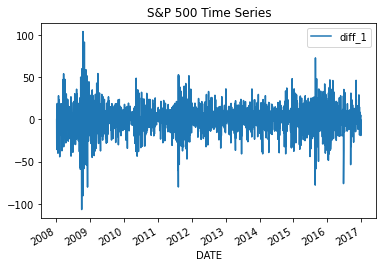

In [30]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

## Partial Autocorrelation Function (PACF)

Text(0.5, 1.0, 'S&P PACF')

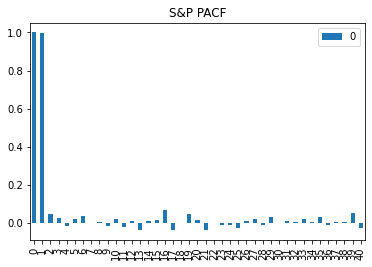

In [33]:
#Initial PACF
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("S&P PACF")

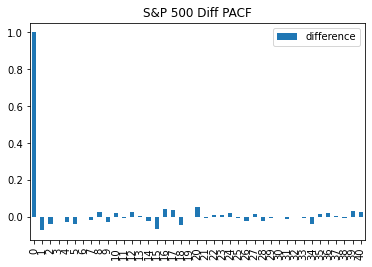

In [34]:
# Differenced time series
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

## Building Models

## We are building a series of models to evaluate, and each will have slightly different parameters for the ARIMA. 
## Note that the parameters are passed in (p, d, q) order, corresponding to the AR, I, and MA portions, respectively.
## The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model1 = ARIMA(sp_data.price, order=(0,1,0))
model1_fit = model1.fit()
print(model1_fit.summary())
print('Residuals Description')
print(model1_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9602.159
Method:                           css   S.D. of innovations             16.753
Date:                Fri, 11 Dec 2020   AIC                          19208.317
Time:                        15:43:17   BIC                          19219.769
Sample:                             1   HQIC                         19212.496
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3494      0.352      0.993      0.321      -0.340       1.039
Residuals Description
count    2.266000e+03
mean    -2.257682e-16
std      1.675631e+01
min     -1.069694e+02
25%     -7.314369e+00

In [47]:
model2 = ARIMA(sp_data.price, order=(1,0,0))
model2_fit = model2.fit()
print(model2_fit.summary())
print('Residuals Description')
print(model2_fit.resid.describe())

C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 0)   Log Likelihood               -9609.725
Method:                       css-mle   S.D. of innovations             16.753
Date:                Fri, 11 Dec 2020   AIC                          19225.450
Time:                        15:43:38   BIC                          19242.628
Sample:                             0   HQIC                         19231.717
                                                                              
                  coef    std err          z      P>|z|      [0.025    

In [48]:
model3 = ARIMA(sp_data.price, order=(1,0,1))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())
print('Residuals Description')
print(model3_fit.resid.describe())

C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 1)   Log Likelihood               -9603.247
Method:                       css-mle   S.D. of innovations             16.705
Date:                Fri, 11 Dec 2020   AIC                          19214.494
Time:                        15:43:59   BIC                          19237.399
Sample:                             0   HQIC                         19222.851
                                                                              
                  coef    std err          z      P>|z|      [0.025    

In [65]:
model4 = ARIMA(sp_data.price, order=(1,1,1))
model4_fit = model4.fit()
print(model4_fit.summary())
print('Residuals Description')
print(model4_111_fit.resid.describe())

C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Fri, 11 Dec 2020   AIC                          19193.947
Time:      

In [59]:
model5 = ARIMA(sp_data.price, order=(5,1,5))
model5_fit = model5.fit()
print(model5_fit.summary())
print('Residuals Description')
print(model5_fit.resid.describe())

C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\00233270\Anaconda3\envs\prv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

## How do these models comapre to each other

### One of the easiest ways to compare time series models is with something called the Akaike information criterion (AIC). The AIC is a measure of the degree of information contained in the model. Once you've identified the model with the lowest AIC, you'll compare that model to other models using the probability of information loss. You can find the probability that another model minimizes information loss using the following calculation:

𝑒𝑥𝑝((𝐴𝐼𝐶𝑚𝑖𝑛−𝐴𝐼𝐶𝑥)/2)


In [77]:
aic_lst = [model1_fit.aic, model2_fit.aic, model3_fit.aic, model4_fit.aic, model5_fit.aic]
Min_aic = min(aic_lst)

In [75]:
# Best model = Min AIC
min(aic_lst)

19193.94739146824

In [76]:
# Worrs model = Max AIC
max(aic_lst)

19225.449570908226

In [72]:
# Check other AIC compared to best one
for i in aic_lst:
    print(math.exp((Min_aic-i)/2))

0.0007578346750370474
1.4434064798826775e-07
3.453987287999907e-05
1.0
0.016364875522389223
